Data Loading

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CapstoneProject/dataset.csv')
print(dataset.shape)
dataset.head()

(9450, 34)


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29 – 13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44 – 12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73 – 10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07 – 13.2],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23 – 12.46],NaN,NaN,EN,2022-08-12 00:00:00


Data preparation


In [ ]:
#Null values
dataset.isnull().sum()

IndicatorCode                    0
Indicator                        0
ValueType                        0
ParentLocationCode               0
ParentLocation                   0
Location type                    0
SpatialDimValueCode              0
Location                         0
Period type                      0
Period                           0
IsLatestYear                     0
Dim1 type                        0
Dim1                             0
Dim1ValueCode                    0
Dim2 type                     9450
Dim2                          9450
Dim2ValueCode                 9450
Dim3 type                     9450
Dim3                          9450
Dim3ValueCode                 9450
DataSourceDimValueCode        9450
DataSource                    9450
FactValueNumericPrefix        9450
FactValueNumeric                 0
FactValueUoM                  9450
FactValueNumericLowPrefix     9450
FactValueNumericLow              0
FactValueNumericHighPrefix    9450
FactValueNumericHigh

In [ ]:
columns_to_remove = ['IndicatorCode', 'Indicator', 'ValueType', 'Location type', 'Period type', 'Dim1 type', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueUoM', 'FactValueNumericLowPrefix', 'FactValueNumericHighPrefix', 'FactValueTranslationID', 'FactComments', 'Language', 'DateModified']

# Remove the specified columns
dataset = dataset.drop(columns=columns_to_remove)


In [ ]:
# dataset = pd.read_csv('/content/drive/MyDrive/CapstoneProject/dataset.csv')
print(dataset.shape)
dataset

(9450, 12)


,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,AFR,Africa,KEN,Kenya,2019,True,Cities,CITY,10.01,6.29,13.74,10.01 [6.29 – 13.74]
1,AMR,Americas,TTO,Trinidad and Tobago,2019,True,Rural,RUR,10.02,7.44,12.55,10.02 [7.44 – 12.55]
2,EUR,Europe,GBR,United Kingdom of Great Britain and Northern I...,2019,True,Cities,CITY,10.06,9.73,10.39,10.06 [9.73 – 10.39]
3,AMR,Americas,GRD,Grenada,2019,True,Total,RESIDENCEAREATYPE_TOTL,10.08,7.07,13.20,10.08 [7.07 – 13.2]
4,AMR,Americas,BRA,Brazil,2019,True,Towns,TOWN,10.09,8.23,12.46,10.09 [8.23 – 12.46]
...,...,...,...,...,...,...,...,...,...,...,...,...
9445,AMR,Americas,BLZ,Belize,2010,False,Cities,CITY,9.92,3.91,20.28,9.92 [3.91 – 20.28]
9446,AMR,Americas,TTO,Trinidad and Tobago,2010,False,Cities,CITY,9.92,7.80,12.89,9.92 [7.8 – 12.89]
9447,AFR,Africa,KEN,Kenya,2010,False,Cities,CITY,9.94,6.30,13.57,9.94 [6.3 – 13.57]
9448,AMR,Americas,USA,United States of America,2010,False,Cities,CITY,9.95,9.78,10.11,9.95 [9.78 – 10.11]


In [ ]:
dataset.columns

Index(['ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode',
       'Location', 'Period', 'IsLatestYear', 'Dim1', 'Dim1ValueCode',
       'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh',
       'Value'],
      dtype='object')

In [ ]:
# #Null values
# columns_to_remove = ['FactValueTranslationID',
# 'FactComments',
# 'FactValueNumericHighPrefix',
# 'FactValueUoM',
# 'FactValueNumericLowPrefix',
# 'Dim2 type',
# 'Dim2',
# 'Dim2ValueCode',
# 'Dim3 type',
# 'Dim3',
# 'Dim3ValueCode',
# 'DataSourceDimValueCode',
# 'DataSource',
# 'FactValueNumericPrefix']

# # Remove the specified columns
# dataset = dataset.drop(columns=columns_to_remove)



In [ ]:
dataset.isnull().sum()

ParentLocationCode      0
ParentLocation          0
SpatialDimValueCode     0
Location                0
Period                  0
IsLatestYear            0
Dim1                    0
Dim1ValueCode           0
FactValueNumeric        0
FactValueNumericLow     0
FactValueNumericHigh    0
Value                   0
dtype: int64

In [ ]:
dataset

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,IsLatestYear,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value
0,AFR,Africa,KEN,Kenya,2019,True,Cities,CITY,10.01,6.29,13.74,10.01 [6.29 – 13.74]
1,AMR,Americas,TTO,Trinidad and Tobago,2019,True,Rural,RUR,10.02,7.44,12.55,10.02 [7.44 – 12.55]
2,EUR,Europe,GBR,United Kingdom of Great Britain and Northern I...,2019,True,Cities,CITY,10.06,9.73,10.39,10.06 [9.73 – 10.39]
3,AMR,Americas,GRD,Grenada,2019,True,Total,RESIDENCEAREATYPE_TOTL,10.08,7.07,13.20,10.08 [7.07 – 13.2]
4,AMR,Americas,BRA,Brazil,2019,True,Towns,TOWN,10.09,8.23,12.46,10.09 [8.23 – 12.46]
...,...,...,...,...,...,...,...,...,...,...,...,...
9445,AMR,Americas,BLZ,Belize,2010,False,Cities,CITY,9.92,3.91,20.28,9.92 [3.91 – 20.28]
9446,AMR,Americas,TTO,Trinidad and Tobago,2010,False,Cities,CITY,9.92,7.80,12.89,9.92 [7.8 – 12.89]
9447,AFR,Africa,KEN,Kenya,2010,False,Cities,CITY,9.94,6.30,13.57,9.94 [6.3 – 13.57]
9448,AMR,Americas,USA,United States of America,2010,False,Cities,CITY,9.95,9.78,10.11,9.95 [9.78 – 10.11]


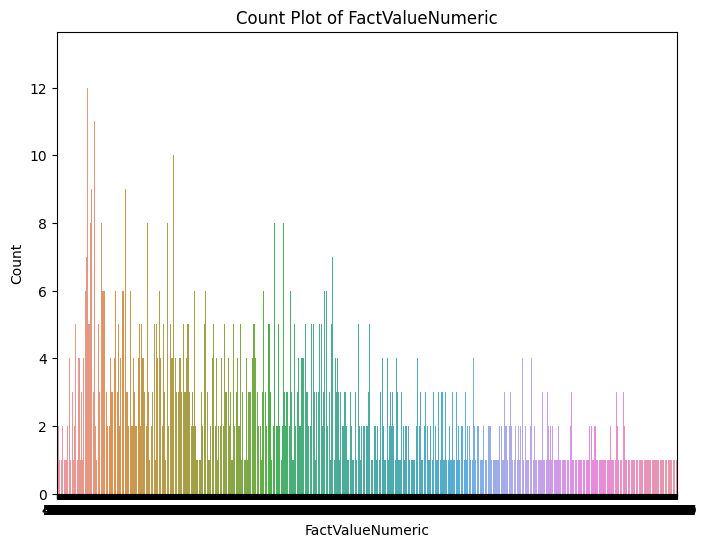

In [ ]:
#Univariate Analysis

# Create a count plot for 'FactValueNumeric'
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x='FactValueNumeric', data=dataset)
plt.title('Count Plot of FactValueNumeric')
plt.xlabel('FactValueNumeric')
plt.ylabel('Count')
plt.show()

7.40     13
7.92     12
7.45     12
7.78     11
8.05     11
         ..
57.46     1
56.32     1
55.83     1
55.76     1
92.79     1
Name: FactValueNumeric, Length: 3954, dtype: int64


<Axes: xlabel='FactValueNumeric', ylabel='count'>

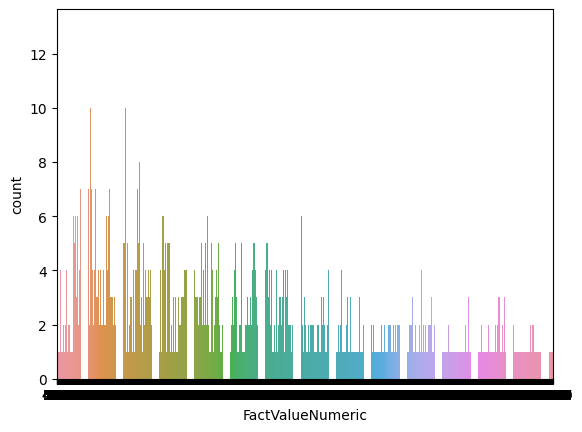

In [ ]:
# print(dataset['FactValueNumeric'].value_counts)
# sns.countplot(dataset['FactValueNumeric'])

# Count the occurrences of unique values in the 'FactValueNumeric' column and print the counts
print(dataset['FactValueNumeric'].value_counts())

# Create a count plot for 'FactValueNumeric'
sns.countplot(x='FactValueNumeric', data=dataset)


6.21     20
6.06     17
6.13     16
7.16     15
7.09     14
         ..
39.12     1
21.11     1
40.17     1
39.75     1
66.17     1
Name: FactValueNumericLow, Length: 3241, dtype: int64


<Axes: ylabel='count'>

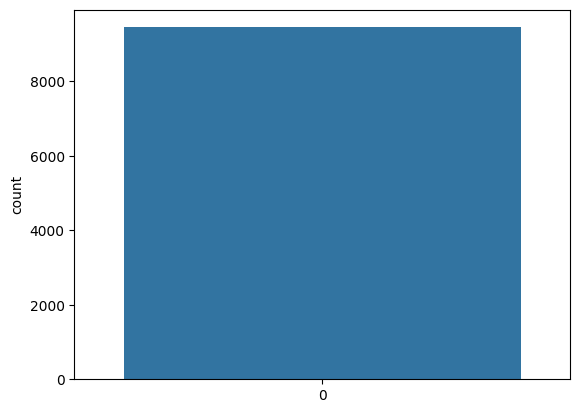

In [ ]:
print(dataset['FactValueNumericLow'].value_counts())
sns.countplot(dataset['FactValueNumericLow'])


17.56     12
13.49     11
14.43     10
19.11     10
13.37     10
          ..
10.63      1
62.75      1
63.93      1
61.26      1
128.40     1
Name: FactValueNumericHigh, Length: 5002, dtype: int64


<Axes: ylabel='count'>

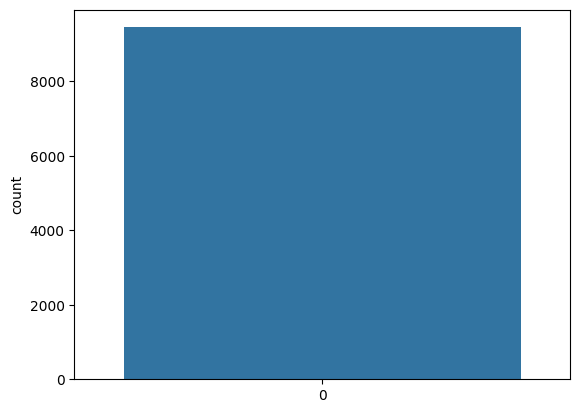

In [ ]:
print(dataset['FactValueNumericHigh'].value_counts())
sns.countplot(dataset['FactValueNumericHigh'])


In [ ]:
print(dataset['Value'])
sns.countplot(dataset['Value']())

In [ ]:
print(dataset['Period'].value_counts())
sns.countplot(dataset['Period']())

In [ ]:
sns.displot(dataset['Period'])
print(dataset['Period'].skew())
print(dataset['Period'].kurt())

In [ ]:
#
sns.boxplot(dataset['Period'])

In [ ]:
sns.displot(dataset['Value'])

In [ ]:
#
sns.countplot(x='FactValueNumeric', hue='FactValueNumericLow', data=dataset)
pd.crosstab(dataset['FactValueNumericLow'], dataset['FactValueNumeric'])

In [ ]:
# plt.figure(figsize=(15,6))
# sns.displot(dataset[dataset['FactValueLow']==0]['FactValueNumeric'])
# sns.displot(dataset[dataset['FactValueLow']==1]['FactValueNumeric'])

In [ ]:
sns.pairplot(dataset)

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
#one hot encoding
dataset.sample(6)
pd.get_dummies(data=dataset, columns=['ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode', 'Location', 'Dim1', 'Dim1ValueCode'], drop_first=True)


In [ ]:
#helan's

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(dataset['FactValueNumeric'], bins=20, kde=True)
plt.xlabel('FactValueNumeric')
plt.ylabel('Frequency')
plt.title('Histogram of FactValueNumeric')
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(dataset['FactValueNumericHigh'], bins=20, kde=True)
plt.xlabel('FactValueNumericHigh')
plt.ylabel('Frequency')
plt.title('Histogram of FactValueNumericHigh')
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(dataset['FactValueNumericLow'], bins=20, kde=True)
plt.xlabel('FactValueNumericLow')
plt.ylabel('Frequency')
plt.title('Histogram of FactValueNumericLow')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt  # Import Matplotlib
# import seaborn as sns
# plt.figure(figsize=(10, 8))
# sns.boxplot(x='FactValueLow', y='FactValueHigh', data=dataset)
# plt.xlabel('FactValueLow')
# plt.ylabel('FactValueHigh')
# plt.title('Box Plot of FactValueNumeric by ValueType')
# plt.show()

In [ ]:
subset_df = dataset[['FactValueNumeric', 'FactValueNumericLow']]

subset_df


In [ ]:
subset_df = dataset[['FactValueNumericHigh', 'FactValueNumericLow']]

subset_df


In [ ]:
# Check for missing values
print(subset_df.isnull().sum())

In [ ]:
# Drop rows with missing values (if any)
subset_df = subset_df.dropna()
subset_df

In [ ]:
# Calculate the correlation matrix
correlation_matrix = subset_df.corr()
correlation_matrix

In [ ]:
# subset_df['FactValueNumeric'] = pd.to_numeric(subset_df['FactValueNumeric'], errors='coerce')
# subset_df['FactValueNumericLow'] = pd.to_numeric(subset_df['FactValueNumericLow'], errors='coerce')

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FactValueNumeric', y='FactValueNumericLow', data=subset_df)
plt.title('Scatter Plot of FactValueNumeric vs. FactValueNumericLow')
plt.xlabel('FactValueNumeric')
plt.ylabel('FactValueNumericLow')
plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FactValueNumeric', y='FactValueNumericHigh', data=subset_df)
plt.title('Scatter Plot of FactValueNumeric vs. FactValueNumericHigh')
plt.xlabel('FactValueNumeric')
plt.ylabel('FactValueNumericHigh')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(dataset.columns)

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Value', kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate summary statistics
summary_stats = dataset.describe()
summary_stats

In [ ]:
# Display the summary statistics
print(summary_stats)

In [ ]:
# Create a scatter plot for two columns (e.g., 'Value' and 'AnotherVariable')
plt.scatter(dataset['Value'], dataset['AnotherVariable'])
plt.xlabel('Value')
plt.ylabel('AnotherVariable')
plt.show()
